#            DIABETICS PREDICTION USING LOGISTIC REGRESSION 
                        PREDICTING WHETHER A PERSON HAS DIABETES OR NOT 
	
  

# Framing the Problem

The objective is to Predict whether a person has diabetes or not based on a number of labels or features: 
this includes: 
        
        Pregnancy : number of times pregnant
	        
        Glucose: glucose level
		
        Blood Pressure:  Diastolic blood pressure (mm Hg)
		
        Skin Thickness:  Triceps skin fold thickness (mm)
		
        Insulin: 2-Hour serum insulin (mu U/ml)
		
        BMI: Body Mass Index
		
        Diabetes Pedigree Function (DBF): A function that scores the likehood of diabetes based on family history
		
        Age: individual Age (years)
		
        Outcome: 0 = healthy individual, 1 = Diabetic individual
This will involve the use of a supervised learning model (linear regression e.t.c). 

It is a regression task as our objective is to predict the outcome label ( 1 or 0).

Furthermore, it will use Batch Learning as it the model will be trained on all our current available data.

# Getting the Data

we will be using a kaggle dataset that was madee available by National Institute of Diabetes 

and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

steps to be done:

          (a) Convert the data to a format you can easily manipulate (ex: changing to all numerical)
		  (b) Check the size and type of data (time series, sample).
		  (C) Sample a test set, put it aside. 

In [31]:
import pandas as pd 
import numpy as np 

diabetes = pd.read_csv('diabetes_1.csv')

#x includes every single column aside from Outcome (what we are trying to predict)
x = diabetes.drop('Outcome', axis = 1)

#y is our Outcome - either a 0 or 1 (diabetic or not diabetic)
y = diabetes["Outcome"]

#checking to see if every column in data frame is all numerical before moving on 
#returns True if all column is Numeric 
diabetes.shape[1] == diabetes.select_dtypes(include=np.number).shape[1]


True

In [32]:
diabetes.shape

(768, 5)

In [33]:
diabetes.describe()

,Glucose,BloodPressure,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,31.992578,33.240885,0.348958
std,31.972618,19.355807,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,27.300000,24.000000,0.000000
50%,117.000000,72.000000,32.000000,29.000000,0.000000
75%,140.250000,80.000000,36.600000,41.000000,1.000000
max,199.000000,122.000000,67.100000,81.000000,1.000000


In [34]:
display(diabetes)

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,72,33.6,50,1
1,85,66,26.6,31,0
2,183,64,23.3,32,1
3,89,66,28.1,21,0
4,137,40,43.1,33,1
...,...,...,...,...,...
763,101,76,32.9,63,0
764,122,70,36.8,27,0
765,121,72,26.2,30,0
766,126,60,30.1,47,1


Data is all Numerical - so we can move to the next step

# Explore the data: 

in this step we will try to get meaningful insight into our data any correlation between attributes 

steps to be done: 

          (a): Study each attribute and its characteristics ( this includes the Name, Type(int/ float, text, structured)
		  and identify correlation between attributes 
          
		  (b): check the % of missing values in data

		  (c): we Study how we would solve this problem manually.
		  (d): Identify extra data that would be useful (maybe in improving model performance)

		  (e): we are going to outline the usefulness of the task/steps done above
		  (f): Document what you have learned from Data exploration

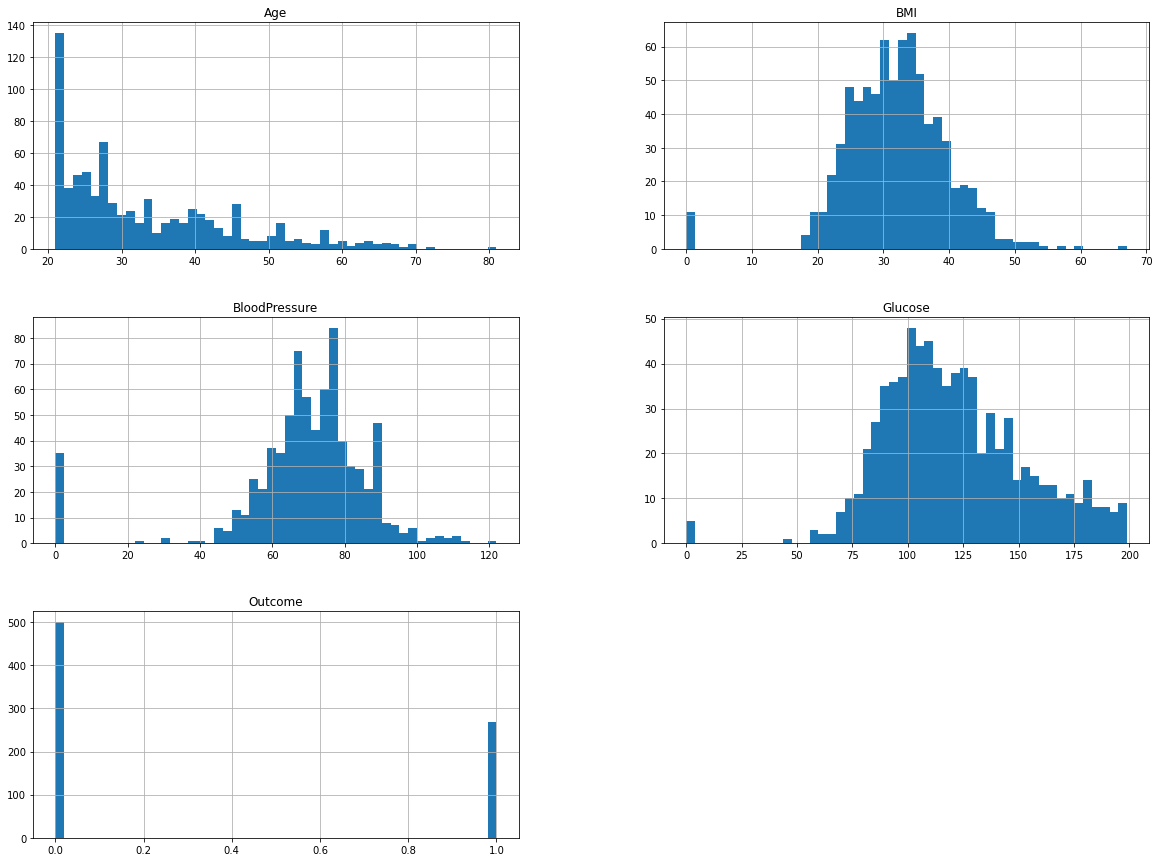

In [35]:
#plot histogram for each numerical attribute  
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
#we are going to check for any missing values in our data 
if all(diabetes.isna().sum()) == 0:
    # Nothing is missing in every column
    print('True')
else: 
    # Something is missing
    print('False')

True


In [37]:
#this would be a case of multiple linear regression 
#y = b0 + b1x1 + b2x2 + ...+bnxn

# DATA PREPARATION:
	In this step we get the data ready for machine learning 
    
    steps to be done: 
	
    1. Data cleaning:
		Fix or remove outliers (optional).
		Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
		columns)
	2. Feature selection (optional):
		Drop the attributes that provide no useful information for the task.

	3. Feature engineering, where appropriate:
		Discretize continuous features.

		Decompose features (e.g., categorical, date/time, etc.).
		Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
		Aggregate features into promising new features.

	4. Feature scaling:
		Standardize or normalize features.

* No missing values in dataset
* feature scaling taken care of in next section 

* We need to now work on corr matrix - see correlation between various attributes and also try attribute combination and because we have some tail heavy distribution we can try to transform them - this includes (Age, DiabetesPedigreeFunction and maybe pregnancies)

# Shortlisting Promising Models and initializing train and test data

Steps to be done:

	(1). splitting up out training and test data and applying various models

	(2). Performance Measure
		For Perfomance measure it depends on the data - but we consider both
		(a): MAE (Mean absolute Error)
		(b): RMSE ( Root MEan square Error)
	(3). Analyze the most significant variables for each algorithm.

	(4). Analyze the types of errors the models make and What data would a human have used to avoid these errors?

	(5). Perform a quick round of feature selection and engineering.

	(6). Perform one or two more quick iterations of the five previous steps.

	(7). Shortlist the top three to five most promising models, preferring models that
	make different types of errors.

In [38]:
from sklearn.pipeline import Pipeline

#modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


def evualate_preds(y_true, y_preds):
    '''
    This will be used to evaluate how good our model is-
    A measure of Accuracy score
     A measure of Precision score
      A measure of Recall
       A measure of f1
    '''
    
    """
    Accuracy classification score.

    In multilabel classification, this function computes subset accuracy: 
    the set of labels predicted for a sample must exactly match the corresponding 
    set of labels in y_true.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    
    """
    The precision is the ratio tp / (tp + fp) where tp is the number of true positives 
    and fp the number of false positives. The precision is intuitively the ability of 
    the classifier not to label as positive a sample that is negative.

    The best value is 1 and the worst value is 0.
    """
    
    precision  = precision_score(y_true, y_preds)
    
    """
    The recall is the ratio tp / (tp + fn) where tp is the number of true positives and 
    fn the number of false negatives. The recall is intuitively the ability of the 
    classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0
    """
    
    recall = recall_score(y_true, y_preds)
    
    """
    Compute the F1 score, also known as balanced F-score or F-measure

    The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

    F1 = 2 * (precision * recall) / (precision + recall)
    """
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2), 
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    print(f"Precision: {precision:.2f}")
    
    print(f"Recall: {recall:.2f}")
    
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

# Transform features by scaling each feature to a given range
scaler = MinMaxScaler(feature_range = (0,1))

#initializing our training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


clf = LogisticRegression(max_iter = 4000)

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

#checking for patterns in our training data
clf.fit(X_train, y_train)

#checking how good our model is 
clf.score(X_test, y_test)

rs_y_preds = clf.predict(X_test)

rs_metrics =  evualate_preds(y_test, rs_y_preds)




Accuracy: 83.12%
Precision: 0.82
Recall: 0.58
F1 score: 0.68


# Saving the Model


In [39]:

import pickle 

#saving an existing model to file 
pickle.dump(clf, open("diabetic_clf_model.plk", "wb"))

In [40]:
#load a saved model

loaded_pickle_model = pickle.load(open("diabetic_clf_model.plk", "rb"))

#makes some predictions with saved model 
pickle_y_preds = loaded_pickle_model.predict(X_test)

print(pickle_y_preds)

evualate_preds(y_test, pickle_y_preds)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0]
Accuracy: 83.12%
Precision: 0.82
Recall: 0.58
F1 score: 0.68


{'accuracy': 0.83, 'precision': 0.82, 'recall': 0.58, 'f1': 0.68}

# FINE TUNING SYSTEM
	


(A): Trying various Parameters to see if model can be improved and best parameters possible

    1: RandomizedSearchCv
    2: GridSearchCv

# 1. Random Search

In [41]:
#1: 
from scipy.stats import uniform as sp_random
from sklearn.model_selection import RandomizedSearchCV
grid = {"class_weight":  ['balanced'], 
        "solver": ["liblinear", "sag", "saga", "newton-cg"],
        "intercept_scaling": sp_random() 
        }


np.random.seed(42)

x = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clp = LogisticRegression(n_jobs = 1)

rs_clp = RandomizedSearchCV(estimator = clp, param_distributions = grid, n_iter = 10, #number of model to try
                            cv = 5, verbose = 2)

rs_clp.fit(X_train, y_train)





Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear 
[CV]  class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear 
[CV]  class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear 
[CV]  class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear 
[CV]  class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear 
[CV]  class_weight=balanced, intercept_scaling=0.8623637087467452, solver=liblinear, total=   0.0s
[CV] class_weight=balanc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means th

[CV]  class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg, total=   0.1s
[CV] class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg, total=   0.1s
[CV] class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.7689177413153975, solver=newton-cg, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.4591357562382613, solver=sag 
[CV]  class_weight=balanced, intercept_scaling=0.4591357562382613, solver=sag, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.4591357562382613, solver=sag 
[CV]  class_weight=balanced, intercept_scaling=0.4591357562382613, solver=sag, total=   0.0s
[CV] class

/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sa

[CV]  class_weight=balanced, intercept_scaling=0.3287516102875082, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.3287516102875082, solver=saga 
[CV]  class_weight=balanced, intercept_scaling=0.3287516102875082, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga 
[CV]  class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga 
[CV]  class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga 
[CV]  class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga 
[CV]  class_weight=balanced, intercept_scaling=0.5796499344717384, solver=saga, total=   0.0s
[CV] class_weight=balanced, intercept_sca

/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/justin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg, total=   0.1s
[CV] class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg, total=   0.1s
[CV] class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg, total=   0.0s
[CV] class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg 
[CV]  class_weight=balanced, intercept_scaling=0.46011915898357203, solver=newton-cg, total=   0.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=1),
                   param_distributions={'class_weight': ['balanced'],
                                        'intercept_scaling': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff67c5f5550>,
                                        'solver': ['liblinear', 'sag', 'saga',
                                                   'newton-cg']},
                   verbose=2)

In [42]:
print(rs_clp.best_score_)
print(rs_clp.best_params_)
#testing the best fit 
print(rs_clp.score(X_test, y_test))

0.7622417699586832
{'class_weight': 'balanced', 'intercept_scaling': 0.7689177413153975, 'solver': 'newton-cg'}
0.7142857142857143


In [43]:
rs_y_preds = rs_clp.predict(X_test)

rs_metrics =  evualate_preds(y_test, rs_y_preds)

Accuracy: 71.43%
Precision: 0.58
Recall: 0.71
F1 score: 0.64


# Grid search

In [44]:
grid_2 = {"class_weight":  ['balanced'], 
        "solver": ["liblinear","newton-cg"],
        "intercept_scaling": [2.5, 5.8, 7.9],
        "C": [0.001,0.01,0.1,1,1.4, 3.5, 6.4,10,100,1000]}

from sklearn.model_selection import GridSearchCV

np.random.seed(42)


x = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clp = LogisticRegression(n_jobs = 1)

gs_clp = GridSearchCV(estimator = clp, param_grid = grid_2, #number of model to try
                            cv = 5, verbose = 2)

gs_clp.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=5.8, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=5.8, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scaling=5.8, solver=liblinear 
[CV]  C=0.001, class_weight=balanced, intercept_scaling=5.8, solver=liblinear, total=   0.0s
[CV] C=0.001, class_weight=balanced, intercept_scali

[CV]  C=0.01, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=0.1, class_weight=balanced, intercept_scaling=2.5, solver=newton-c

[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear 
[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear 
[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear 
[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=liblinear, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg 
[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg 
[CV]  C=1, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=1, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg 
[CV]  C=1, class_weigh

[CV]  C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg 
[CV]  C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg 
[CV]  C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg 
[CV]  C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg 
[CV]  C=3.5, class_weight=balanced, intercept_scaling=5.8, solver=newton-cg, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=7.9, solver=liblinear 
[CV]  C=3.5, class_weight=balanced, intercept_scaling=7.9, solver=liblinear, total=   0.0s
[CV] C=3.5, class_weight=balanced, intercept_scaling=7.9, solver=liblinear

[CV]  C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg 
[CV]  C=10, class_weight=balanced, intercept_scaling=2.5, solver=newton-cg, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=5.8, solver=liblinear 
[CV]  C=10, class_weight=balanced, intercept_scaling=5.8, solver=liblinear, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=5.8, solver=liblinear 
[CV]  C=10, class_weight=balanced, intercept_scaling=5.8, solver=liblinear, total=   0.0s
[CV] C=10, class_weight=balanced, intercept_scaling=5.8, solver=liblinear 
[CV]  C=10

[CV]  C=100, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=100, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg 
[CV]  C=100, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=100, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg 
[CV]  C=100, class_weight=balanced, intercept_scaling=7.9, solver=newton-cg, total=   0.0s
[CV] C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear 
[CV]  C=1000, class_weight=balanced, intercept_scaling=2.5, solver=liblinear, total=   0.0s
[CV] C=1000, class_weight=balanced, intercept_scaling=2.5, solver=li

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    5.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.4, 3.5, 6.4, 10, 100,
                               1000],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [2.5, 5.8, 7.9],
                         'solver': ['liblinear', 'newton-cg']},
             verbose=2)

In [45]:
print(gs_clp.best_score_)
print(gs_clp.best_params_)
#testing the best fit 
print(gs_clp.score(X_test, y_test))
gs_y_preds = gs_clp.predict(X_test)

gs_metrics =  evualate_preds(y_test, rs_y_preds)


0.7622417699586832
{'C': 0.1, 'class_weight': 'balanced', 'intercept_scaling': 2.5, 'solver': 'newton-cg'}
0.7142857142857143
Accuracy: 71.43%
Precision: 0.58
Recall: 0.71
F1 score: 0.64


# PRESENT SOLUTION:

	In this step we are going to document what we have done, describing what worked and what did not, and system limitations

We implemented this project which focussed on predicting individuals or patients with diabetes based on  a variety of criteria - This includes: 

(a): Glucose Level
(b):Blood Pressure
(c): SkinThickness 
(d): Insulin 
(e): BMI
(f): DiabetesPedigreeFunction
(g): Age 

We explored the data to find any correlations in our data or see if any attribute combinations were possible to yield a higher correlation score than set attributes (such as Glucose Level e.t.c) 

However, after scaling, training and testing the model it did yielded a score of 74.68.  

based on some data analysis of our diabetes dataset using the Weka Explorer, I came to the conclusion that some features were not important and did not sufficiently contribute in providing an accurate outcome and could be dragging the model performance down. 

Furthermore, after removing the following features: pregnancy, SkinThickness, Insulin, and diabetesPedigreeFunction, and training and testing the model it resulted in the following results: 

    Accuracy: 82.47%
    precision: 0.93
    recall: 0.50
    F1 score: 0.65

Hyperparameter tuning did not improve model performance - 
  
Therefore, based on this results i have come up with 2 conclusions:

(a): The removal of certain features result in a better model performance and accuracy score 

(b): System Limitations: There was not sufficient data and therefore, could not get full performance on the model. 
